In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats

# Renyi entropy $S_2$ from theory and ED

In [2]:
x_th = np.arange(6.5,14.5,0.1)
y_th = 2*0.15884297*x_th

In [20]:
N = 15
Ns = N
ts = 1j*np.linspace(0.5, 2, 7, endpoint=True)
Lxs = np.sqrt(2*np.pi*Ns/np.imag(ts))
Lys = Lxs*np.imag(ts)

for i in range(ts.size):
    print(f"Torus dimensions at t = {ts[i]} \nLx = ",Lxs[i], "\nLy = ",Lys[i])

Torus dimensions at t = 0.5j 
Lx =  13.729368492956533 
Ly =  6.864684246478267
Torus dimensions at t = 0.75j 
Lx =  11.209982432795856 
Ly =  8.407486824596893
Torus dimensions at t = 1j 
Lx =  9.708129562778495 
Ly =  9.708129562778495
Torus dimensions at t = 1.25j 
Lx =  8.683215054699211 
Ly =  10.854018818374014
Torus dimensions at t = 1.5j 
Lx =  7.926654595212021 
Ly =  11.889981892818032
Torus dimensions at t = 1.75j 
Lx =  7.338656148201747 
Ly =  12.842648259353057
Torus dimensions at t = 2j 
Lx =  6.864684246478267 
Ly =  13.729368492956533


In [21]:
S_ED = np.zeros(ts.size)
for k in range(ts.size):
    M = np.loadtxt(f"IQHE_entropy_results/N_{N}/ED/overlap_diag_N_{N}_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)[:,0]
    S_ED[k] = -np.sum(np.log(M**2 + (1-M)**2))

C:\Users\crist\AppData\Local\Temp\ipykernel_26984\3349027341.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  S_ED[k] = -np.sum(np.log(M**2 + (1-M)**2))


In [22]:
S_ED

array([4.35019122, 3.55198712, 3.07611296, 2.75136394, 2.51165296,
       2.32536517, 2.17522613])

# Renyi entropy $S_{2}$ from MC simulation

## Test 2

In [58]:
N = 15
#non-thermal iterations
M0 = int(5e5)
M = int(5e6)
Ns = N

### Acceptance 30%

In [56]:
#aspect ratio Ly/Lx
rs_30 = np.linspace(0.75, 2, 6, endpoint=True)

Lxs_30 = np.sqrt(2*np.pi*Ns/rs_30)
Lys_30 = Lxs_30*rs_30

In [63]:
p_means_30 = np.zeros(rs_30.size)
p_vars_30 = np.zeros(rs_30.size)
p_step_const = 0.132/np.sqrt(0.5)

mod_means_30 = np.zeros(rs_30.size)
mod_vars_30 = np.zeros(rs_30.size)
mod_step_const = 0.131/np.sqrt(0.5)

sign_means_30 = np.zeros(rs_30.size)
sign_vars_30 = np.zeros(rs_30.size)
sign_step_const = 0.1325/np.sqrt(0.5)

for i in range(rs_30.size):
    print(f"t = {rs_30[i]}j:")
    step = p_step_const*np.sqrt(rs_30[i])
    p = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_30/p_swap_N_{N}_t_{rs_30[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means_30[i], p_vars_30[i] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means_30[i]} +- {np.sqrt(p_vars_30[i]/p.size)}")

    step = mod_step_const*np.sqrt(rs_30[i])
    mod = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_30/mod_swap_N_{N}_t_{rs_30[i]:.2f}_step_{step:.3f}.npy"))
    print(f"acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means_30[i], mod_vars_30[i] = Stats(mod)
    print(f"mod = {mod_means_30[i]} +- {np.sqrt(mod_vars_30[i]/mod.size)}")

    step = sign_step_const*np.sqrt(rs_30[i])
    sign = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_30/sign_swap_N_{N}_t_{rs_30[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means_30[i], sign_vars_30[i] = Stats(sign)
    print(f"sign = {sign_means_30[i]} +- {np.sqrt(sign_vars_30[i]/sign.size)}")

t = 0.75j:
p acceptance: 0.29978559999999316
p = 0.23722372506139444 +- 0.00014179352333171342
acceptance: 0.3006988000000163
mod = 0.3509649202894191 +- 0.00043169050059510127
sign acceptance: 0.3097052000000083
sign = 0.34887910601822325 +- 0.00030086915380715115
t = 1.0j:
p acceptance: 0.29961160000002096
p = 0.25282372159472855 +- 0.00014487691610993246
acceptance: 0.3047035999999946
mod = 0.42335962643779607 +- 0.0004562150089127699
sign acceptance: 0.3127262000000103
sign = 0.4258863162370308 +- 0.00028779287295417204
t = 1.25j:
p acceptance: 0.29858060000003706
p = 0.2610697197622845 +- 0.0001464059505414565
acceptance: 0.3074939999999974
mod = 0.469587122353136 +- 0.0004985412816401347
sign acceptance: 0.31147699999997214
sign = 0.5195515288705639 +- 0.00026722247883599224
t = 1.5j:
p acceptance: 0.3000701999999806
p = 0.2790774935383348 +- 0.00014951523376071667
acceptance: 0.30907079999999604
mod = 0.4909923930720817 +- 0.00040036590184488747
sign acceptance: 0.31405219999999

Text(0.5, 0, '$L_{x}$')

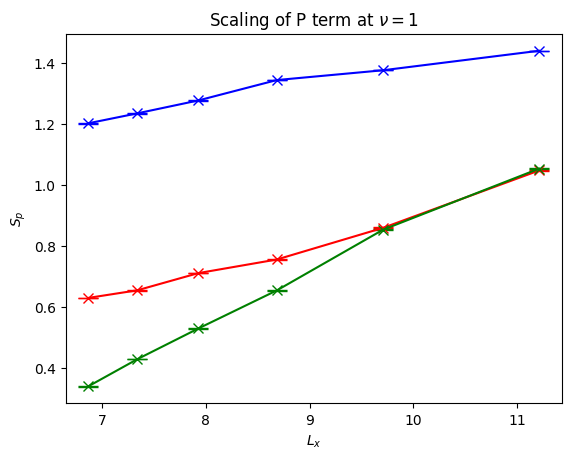

In [65]:
plt.errorbar(Lxs, -np.log(p_means_30), np.sqrt(p_vars_30/p_means_30**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=7, capsize=7)
plt.errorbar(Lxs, -np.log(mod_means_30), np.sqrt(mod_vars_30/mod_means_30**2)/np.sqrt(M-M0), marker='x',
             color='red', markersize=7, capsize=7)
plt.errorbar(Lxs, -np.log(sign_means_30), np.sqrt(sign_vars_30/sign_means_30**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=7, capsize=7)
plt.title("Scaling of P term at $\\nu=1$")
plt.ylabel("$S_{p}$")
plt.xlabel("$L_{x}$")

### Acceptance 50%

In [69]:
#aspect ratio Ly/Lx
rs_50 = np.linspace(0.5, 2, 7, endpoint=True)

Lxs_50 = np.sqrt(2*np.pi*Ns/rs_50)
Lys_50 = Lxs_50*rs_50

In [71]:
p_means_50 = np.zeros(rs_50.size)
p_vars_50 = np.zeros(rs_50.size)
p_step_const = 0.077/np.sqrt(0.5)

mod_means_50 = np.zeros(rs_50.size)
mod_vars_50 = np.zeros(rs_50.size)
mod_step_const = 0.077/np.sqrt(0.5)

sign_means_50 = np.zeros(rs_50.size)
sign_vars_50 = np.zeros(rs_50.size)
sign_step_const = 0.079/np.sqrt(0.5)

for i in range(rs_50.size):
    print(f"t = {rs_50[i]}j:")
    step = p_step_const*np.sqrt(rs_50[i])
    p = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_50/p_swap_N_{N}_t_{rs_50[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means_50[i], p_vars_50[i] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means_50[i]} +- {np.sqrt(p_vars_50[i]/p.size)}")

    step = mod_step_const*np.sqrt(rs_50[i])
    mod = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_50/mod_swap_N_{N}_t_{rs_50[i]:.2f}_step_{step:.3f}.npy"))
    print(f"mod acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means_50[i], mod_vars_50[i] = Stats(mod)
    print(f"mod = {mod_means_50[i]} +- {np.sqrt(mod_vars_50[i]/mod.size)}")

    step = sign_step_const*np.sqrt(rs_50[i])
    sign = np.real(np.load(f"IQHE_entropy_results/final_test/acceptance_50/sign_swap_N_{N}_t_{rs_50[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means_50[i], sign_vars_50[i] = Stats(sign)
    print(f"sign = {sign_means_50[i]} +- {np.sqrt(sign_vars_50[i]/sign.size)}")

t = 0.5j:
p acceptance: 0.5021004000000853
p = 0.2128168415962574 +- 0.00013643306601865282
mod acceptance: 0.49944159999999993
mod = 0.2249322706444102 +- 0.0004814149679549669
sign acceptance: 0.5026796000000365
sign = 0.27264927297602165 +- 0.0003121919258427036
t = 0.75j:
p acceptance: 0.5020761999999797
p = 0.23500261444386344 +- 0.00014133348492460912
mod acceptance: 0.5023222000000657
mod = 0.34278944977072967 +- 0.0004411654826369106
sign acceptance: 0.5053234000000094
sign = 0.35164732681486954 +- 0.0003004015077846456
t = 1.0j:
p acceptance: 0.5019467999999845
p = 0.2540032768881607 +- 0.000145099817067898
mod acceptance: 0.5045085999999699
mod = 0.4271544646112778 +- 0.0004628681197358821
sign acceptance: 0.5052717999999565
sign = 0.43185741447035725 +- 0.00028604074902781736
t = 1.25j:
p acceptance: 0.501868799999946
p = 0.2671666072963095 +- 0.00014749335625040838
mod acceptance: 0.5056571999999465
mod = 0.47300026283949986 +- 0.00039767002286939586
sign acceptance: 0.5055

Text(0.5, 0, '$L_{x}$')

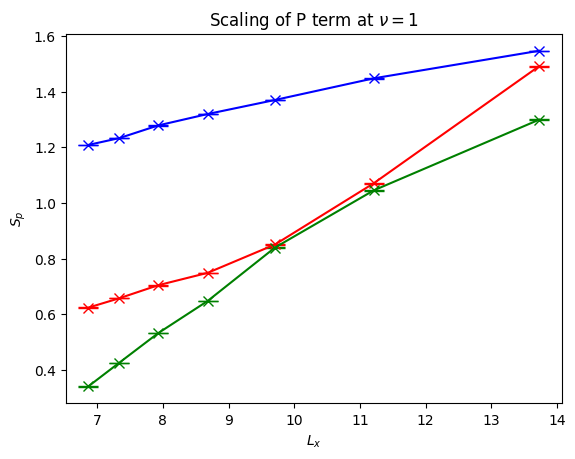

In [73]:
plt.errorbar(Lxs_50, -np.log(p_means_50), np.sqrt(p_vars_50/p_means_50**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=7, capsize=7)
plt.errorbar(Lxs_50, -np.log(mod_means_50), np.sqrt(mod_vars_50/mod_means_50**2)/np.sqrt(M-M0), marker='x',
             color='red', markersize=7, capsize=7)
plt.errorbar(Lxs_50, -np.log(sign_means_50), np.sqrt(sign_vars_50/sign_means_50**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=7, capsize=7)
plt.title("Scaling of P term at $\\nu=1$")
plt.ylabel("$S_{p}$")
plt.xlabel("$L_{x}$")

### Entropy

In [74]:
S_MC_30 = np.zeros(rs_30.size)
err_30 = np.zeros(rs_30.size)

S_MC_30 = -np.log(p_means_30*mod_means_30*sign_means_30)
err_30 = np.exp(-S_MC_30)*np.sqrt(p_vars_30/(p_means_30**2) + mod_vars_30/(mod_means_30**2) + sign_vars_30/(sign_means_30**2))/np.sqrt(M-M0)

S_MC_50 = np.zeros(rs_50.size)
err_50 = np.zeros(rs_50.size)

S_MC_50 = -np.log(p_means_50*mod_means_50*sign_means_50)
err_50 = np.exp(-S_MC_50)*np.sqrt(p_vars_50/(p_means_50**2) + mod_vars_50/(mod_means_50**2) + sign_vars_50/(sign_means_50**2))/np.sqrt(M-M0)

(6.105000000000001, 14.79499999999997)

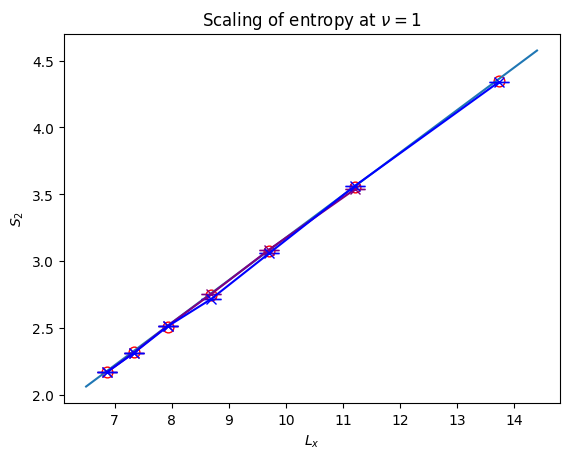

In [76]:
plt.plot(x_th,y_th)
plt.errorbar(Lxs_30, S_MC_30, err_30, marker='x',
             color='purple', markersize=7, capsize=7)
plt.errorbar(Lxs_50, S_MC_50, err_50, marker='x',
             color='blue', markersize=7, capsize=7)
plt.scatter(Lxs_50, S_ED, marker='o',
             color='red', s=60, facecolor='white')
plt.title("Scaling of entropy at $\\nu=1$")
plt.ylabel("$S_{2}$")
plt.xlabel("$L_{x}$")
plt.xlim()

## Test 1

In [6]:
N = 15
#aspect ratio Ly/Lx
rs = np.linspace(0.8, 1.2, 5, endpoint=True)
#non-thermal iterations
M0 = int(0.5*1e5)

In [8]:
Ns = N
Lxs = np.sqrt(2*np.pi*Ns/rs)
Lys = Lxs*rs

p_means = np.zeros(rs.size)
p_vars= np.zeros(rs.size)
mod_means = np.zeros(rs.size)
mod_vars = np.zeros(rs.size)
sign_means = np.zeros(rs.size)
sign_vars = np.zeros(rs.size)

for i in range(rs.size):
    print(f"t = {rs[i]}j:")
    if i != 2:
        p = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/p_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex))
    else:
        p = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/p_N_{N}_r_{rs[i]:.2f}_acc_50.17.dat", dtype=complex))
    p = p[M0:]
    p_means[i], p_vars[i] = Stats(p)
    print(f"p = {p_means[i]} +- {np.sqrt(p_vars[i]/p.size)}")
    
    if i != 2:
        mod = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/mod_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex))
    else:
        mod = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/mod_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex))
        #mod = np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/mod_N_{N}_r_{rs[i]:.2f}_acc_49.41.dat")
    mod = mod[M0:]
    mod_means[i], mod_vars[i] = Stats(mod)
    print(f"mod = {mod_means[i]} +- {np.sqrt(mod_vars[i]/mod.size)}")
    
    if i != 2:
        sign = np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/sign_N_{N}_r_{rs[i]:.2f}.dat", dtype=complex)
    else:
        sign = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/sign_N_{N}_r_{rs[i]:.2f}_acc_49.69.dat", dtype=complex))
    imag = np.imag(sign[M0:])
    mean_imag, std_imag = Stats(imag)
    #sign = sign[M0:]
    sign = np.real(sign[M0:])
    sign_means[i], sign_vars[i] = Stats(sign)
    print(f"sign = {sign_means[i]} +- {np.sqrt(sign_vars[i]/sign.size)}")
    print(f"Im(sign) = {mean_imag} +- {std_imag/np.sqrt(imag.size)} \n")

t = 0.8j:
p = 0.23787111111111112 +- 0.0006347157692384561
mod = 0.36583533397534007 +- 0.001253848558835777
sign = 0.3592395534921175 +- 0.0009478773443617558
Im(sign) = -0.001577428198471615 +- 0.0006956172443167572 

t = 0.9j:
p = 0.2487111111111111 +- 0.0006443848221413913
mod = 0.4104898018705166 +- 0.0016876163516212285
sign = 0.3962023802529166 +- 0.0009262666274324974
Im(sign) = 0.003187018453447975 +- 0.000681149463355288 

t = 1.0j:
p = 0.25180444444444444 +- 0.0006470435068109044
mod = 0.42729024679337374 +- 0.0011469528150814814
sign = 0.42685765111729135 +- 0.0009108116709626709
Im(sign) = 0.0 +- 0.0 

t = 1.1j:
p = 0.2576 +- 0.0006519077388432949
mod = 0.4469276123037126 +- 0.0014696165249163133
sign = 0.4599769884760363 +- 0.0008878594175464942
Im(sign) = 0.002496963282190953 +- 0.0006464982821798602 

t = 1.2j:
p = 0.26208444444444445 +- 0.0006555686559434132
mod = 0.4638725729939086 +- 0.001240388849386667
sign = 0.49585359041640675 +- 0.000858865212406463
Im(sign) = -

In [94]:
S_MC = np.zeros(rs.size)
err = np.zeros(rs.size)

S_MC = -np.log(p_means*mod_means*sign_means)
err = np.exp(-S_MC)*np.sqrt(p_vars/(p_means**2) + mod_vars/(mod_means**2) + sign_vars/(sign_means**2))/np.sqrt(p.size)

In [10]:
rs_acc = np.linspace(0.9, 1.1, 3, endpoint=True)
Lxs_acc = np.sqrt(2*np.pi*Ns/rs_acc)
Lys_acc = Lxs_acc*rs_acc

p_acc = [41.41, 40.72, 41.15]
mod_acc = [41.34, 41.06, 41.54]

p_means_acc = np.zeros(rs_acc.size)
p_vars_acc= np.zeros(rs_acc.size)
mod_means_acc = np.zeros(rs_acc.size)
mod_vars_acc = np.zeros(rs_acc.size)

for i in range(rs_acc.size):
    print(f"t = {rs_acc[i]}j:")
    p = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/p_N_{N}_r_{rs_acc[i]:.2f}_acc_{p_acc[i]}.dat", dtype=complex))
    p = p[M0:]
    p_means_acc[i], p_vars_acc[i] = Stats(p)
    print(f"p = {p_means_acc[i]} +- {np.sqrt(p_vars_acc[i]/p.size)}")
    
    mod = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/mod_N_{N}_r_{rs_acc[i]:.2f}_acc_{mod_acc[i]}.dat", dtype=complex))
        #mod = np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/mod_N_{N}_r_{rs[i]:.2f}_acc_49.41.dat")
    mod = mod[M0:]
    mod_means_acc[i], mod_vars_acc[i] = Stats(mod)
    print(f"mod = {mod_means_acc[i]} +- {np.sqrt(mod_vars_acc[i]/mod.size)}")
  
    """
    sign = np.real(np.loadtxt(f"IQHE_entropy_results/N_{N}/MC/sign_N_{N}_r_{rs[i]:.2f}_acc_49.69.dat", dtype=complex))
    imag = np.imag(sign[M0:])
    mean_imag, std_imag = Stats(imag)
    #sign = sign[M0:]
    sign = np.real(sign[M0:])
    sign_means[i], sign_vars[i] = Stats(sign)
    print(f"sign = {sign_means[i]} +- {np.sqrt(sign_vars[i]/sign.size)}")
    print(f"Im(sign) = {mean_imag} +- {std_imag/np.sqrt(imag.size)} \n")
    """

t = 0.9j:
p = 0.2437088888888889 +- 0.0006399917984803212
mod = 0.40013673827591867 +- 0.0012751580840663665
t = 1.0j:
p = 0.25279111111111113 +- 0.000647882336721111
mod = 0.4386435648675723 +- 0.0012625775303450207
t = 1.1j:
p = 0.2615688888888889 +- 0.0006551522884521532
mod = 0.4520260052188059 +- 0.0013767834188610883


## Individual terms scaling

In [11]:
print(p_means)
print(np.sqrt(p_vars/p.size))
print(-np.log(p_means))
print(np.sqrt(p_vars/p_means**2)/np.sqrt(p.size))

[0.23787111 0.24871111 0.25180444 0.2576     0.26208444]
[0.00063472 0.00064438 0.00064704 0.00065191 0.00065557]
[1.4360263  1.39146325 1.37910251 1.35634728 1.33908852]
[0.00266832 0.0025909  0.00256963 0.0025307  0.00250136]


In [12]:
print(p_means_acc)
print(np.sqrt(p_vars_acc/p.size))
print(-np.log(p_means_acc))
print(np.sqrt(p_vars_acc/p_means_acc**2)/np.sqrt(p.size))

[0.24370889 0.25279111 0.26156889]
[0.00063999 0.00064788 0.00065515]
[1.41178084 1.37519178 1.34105759]
[0.00262605 0.00256292 0.0025047 ]


Text(0.5, 0, '$L_{x}$')

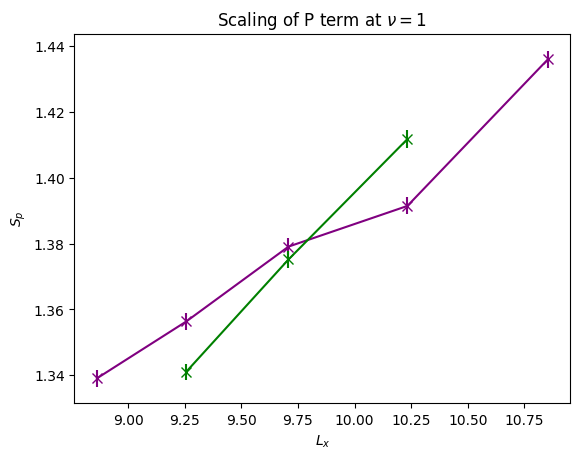

In [15]:
plt.errorbar(Lxs, -np.log(p_means), np.sqrt(p_vars/p_means**2)/np.sqrt(p.size), marker='x', color='purple', markersize=7)
plt.errorbar(Lxs_acc, -np.log(p_means_acc), np.sqrt(p_vars_acc/p_means_acc**2)/np.sqrt(p.size), marker='x', color='green', markersize=7)
plt.title("Scaling of P term at $\\nu=1$")
plt.ylabel("$S_{p}$")
plt.xlabel("$L_{x}$")

In [79]:
print(mod_means)
print(np.sqrt(mod_vars/mod.size))
print(-np.log(mod_means))
print(np.sqrt(mod_vars/mod_means**2)/np.sqrt(mod.size))

[0.36583533 0.4104898  0.42729025 0.44692761 0.46387257]
[0.00125385 0.00168762 0.00114695 0.00146962 0.00124039]
[1.00557195 0.89040419 0.85029176 0.80535864 0.76814539]
[0.00342736 0.00411123 0.00268425 0.00328827 0.00267399]


Text(0.5, 0, '$L_{x}$')

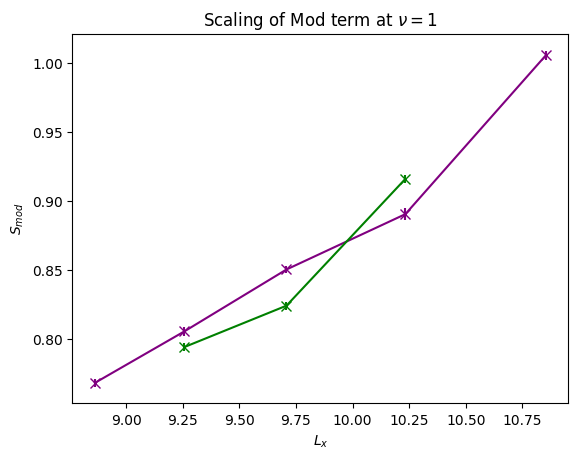

In [16]:
plt.errorbar(Lxs, -np.log(mod_means), np.sqrt(mod_vars/mod_means**2)/np.sqrt(mod.size), marker='x', color='purple', markersize=7)
plt.errorbar(Lxs_acc, -np.log(mod_means_acc), np.sqrt(mod_vars_acc/mod_means_acc**2)/np.sqrt(mod.size), marker='x', color='green', markersize=7)
plt.title("Scaling of Mod term at $\\nu=1$")
plt.ylabel("$S_{mod}$")
plt.xlabel("$L_{x}$")

In [81]:
print(sign_means)
print(np.sqrt(sign_vars/mod.size))
print(-np.log(sign_means))
print(np.sqrt(sign_vars/sign_means**2)/np.sqrt(mod.size))

[0.35923955 0.39620238 0.42685765 0.45997699 0.49585359]
[0.00094788 0.00092627 0.00091081 0.00088786 0.00085887]
[1.02376583 0.92583014 0.85130469 0.77657882 0.70147458]
[0.00263857 0.00233786 0.00213376 0.00193023 0.00173209]


Text(0.5, 0, '$L_{x}$')

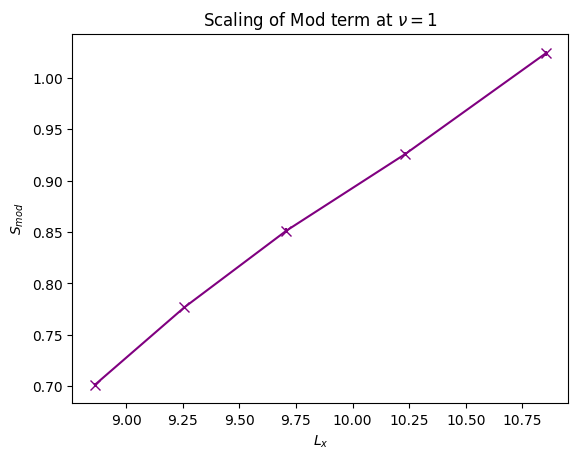

In [82]:
plt.errorbar(Lxs, -np.log(sign_means), np.sqrt(sign_vars/sign_means**2)/np.sqrt(p.size), marker='x', color='purple', markersize=7)

plt.title("Scaling of Mod term at $\\nu=1$")
plt.ylabel("$S_{mod}$")
plt.xlabel("$L_{x}$")

## Compare MC with ED

Text(0.5, 0, '$L_{x}$')

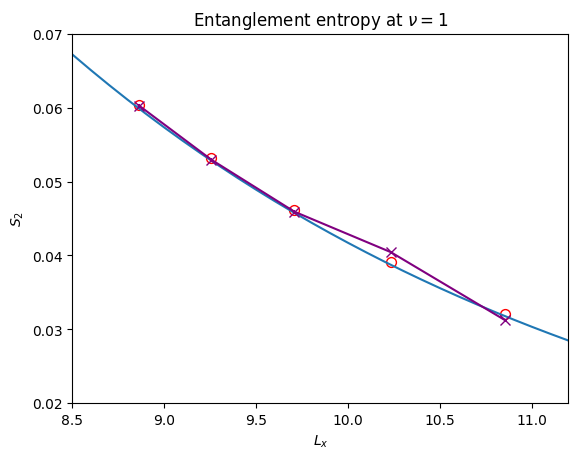

In [95]:
plt.scatter(Lxs, np.exp(-S_ED), color='red', s=50, marker='o', facecolor='white')
plt.plot(x_th,np.exp(-y_th))
plt.errorbar(Lxs, np.exp(-S_MC), err, marker='x', color='purple', markersize=7)
plt.xlim(8.5,11.2)
plt.ylim(0.02,0.07)

plt.title("Entanglement entropy at $\\nu=1$")
plt.ylabel("$S_{2}$")
plt.xlabel("$L_{x}$")

### Replace bad terms

In [ ]:
M0 = int(1e5)
M = 5e5
N=15
p = np.real(np.loadtxt(f"IQHE_entropy_results/N_{15}/MC/p_N_{15}_r_{1.00:.2f}_acc_50.17.dat", dtype=complex))
p = p[M0:]
mean_p, std_p = Stats(p)
print(f"N={N}, Mean: {mean_p:.6f}, Std: {std_p/np.sqrt(M-M0):.6f}")

In [27]:
S_ED

array([3.43919729, 3.24250693, 3.07611296, 2.93295997, 2.80809754])